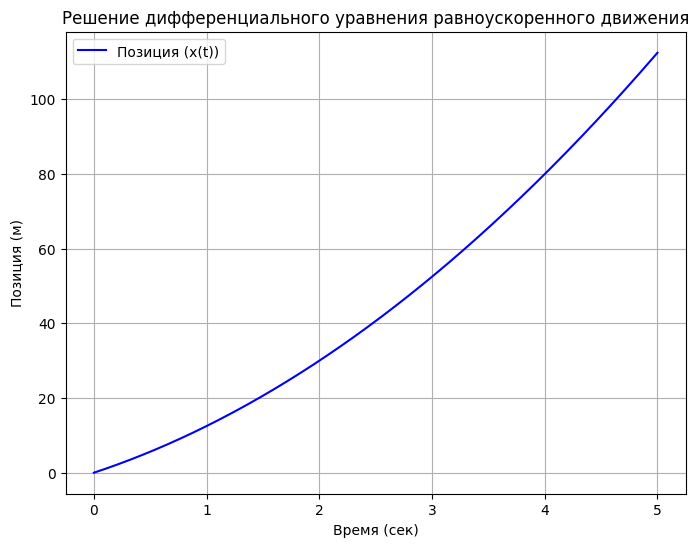

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функция, представляющая систему дифференциальных уравнений равноускоренного движения
def acceleration(t, y):
    x, v = y
    dxdt = v
    dvdt = a
    return [dxdt, dvdt]

# Начальные условия
x0 = 0.0  # Начальная позиция
v0 = 10.0  # Начальная скорость
a = 5.0  # Ускорение

# Временные точки для решения
t_span = (0.0, 5.0)  # Временной интервал от 0 до 5 секунд

# Решение уравнения
sol = solve_ivp(acceleration, t_span, [x0, v0], t_eval=np.linspace(0, 5, 500))

# Извлечение результатов
t = sol.t
x = sol.y[0]
v = sol.y[1]

# Построение графика позиции от времени
plt.figure(figsize=(8, 6))
plt.plot(t, x, label='Позиция (x(t))', color='blue')
plt.xlabel('Время (сек)')
plt.ylabel('Позиция (м)')
plt.title('Решение дифференциального уравнения равноускоренного движения')
plt.grid(True)
plt.legend()
plt.show()


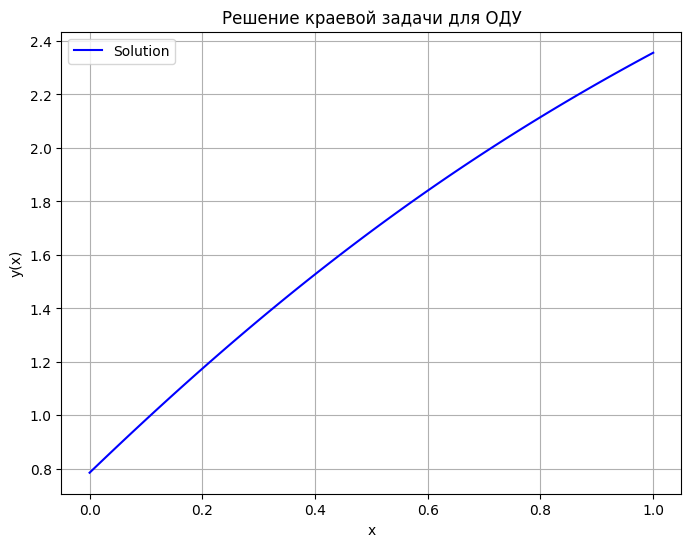

In [6]:
# Пример и отображение краевой задачи для ОДУ
# В этом примере мы определяем ОДУ справа ode, задаем краевые условия boundary_conditions, задаем интервал интеграции, начальное приближение и решаем краевую задачу с помощью solve_bvp из scipy. Затем мы строим график решения, полученного для функции y(x).
# Обратите внимание, что в этом примере рассматривается краевая задача для уравнения y'' + sin(y) = 0 с краевыми условиями y(0) = π/4 и y(1) = 3π/4. Вы можете изменить ОДУ и краевые условия в соответствии с вашей конкретной задачей.

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# Определение правой части ОДУ
def ode(x, y):
    dydx = np.vstack((y[1], -np.sin(y[0])))
    return dydx

# Определение краевых условий
def boundary_conditions(ya, yb):
    return np.array([ya[0] - np.pi/4, yb[0] - 3*np.pi/4])

# Задание начальной и конечной точки для интеграции
x_values = np.linspace(0, 1, 100)  # Интервал интеграции от 0 до 1

# Задание начального приближения для решения
initial_guess = np.zeros((2, x_values.size))

# Решение краевой задачи
solution = solve_bvp(ode, boundary_conditions, x_values, initial_guess)

# Получение решения
x_solution = solution.x
y_solution = solution.y[0]

# Строим график решения
plt.figure(figsize=(8, 6))
plt.plot(x_solution, y_solution, label='Solution', color='blue')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Решение краевой задачи для ОДУ')
plt.grid(True)
plt.legend()
plt.show()


Собственное значение 1: (-39194.13122379518+0j)
Собственное значение 2: (-39164.53483220198+0j)
Собственное значение 3: (-39115.24062627763+0j)
Собственное значение 4: (-39046.29824110929+0j)
Собственное значение 5: (-38957.77709583475+0j)


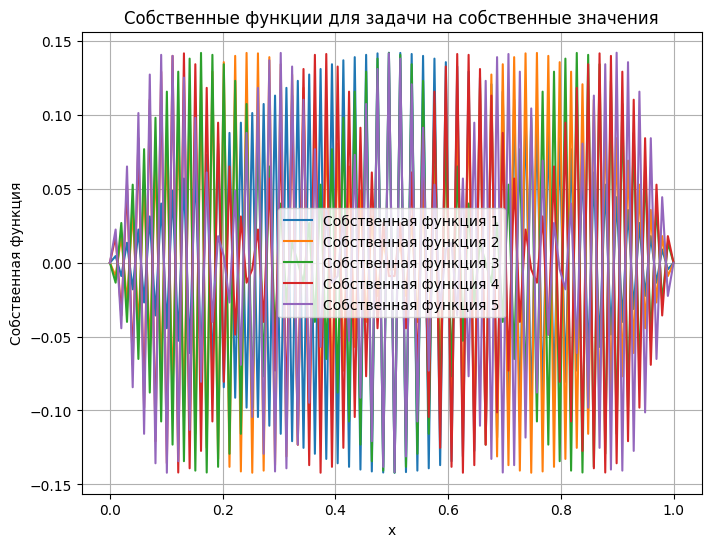

In [5]:
# Пример задачи на собственные значения

import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Определяем оператор для уравнения на собственные значения
def operator(u, x):
    return -u(x)  # Пример оператора для уравнения на собственные значения

# Задаем параметры
L = 1.0  # Длина домена
n = 100  # Количество узлов на домене
x = np.linspace(0, L, n)  # Сетка на домене

# Построение матрицы оператора (дискретизация дифференциального оператора)
dx = x[1] - x[0]
A = np.zeros((n, n))
for i in range(1, n - 1):
    A[i, i - 1] = 1.0 / dx**2
    A[i, i] = -2.0 / dx**2
    A[i, i + 1] = 1.0 / dx**2

# Вычисление собственных значений и собственных функций
eigenvalues, eigenvectors = eig(A)

# Сортировка собственных значений и функций
sorted_indices = eigenvalues.argsort()
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Вывод первых нескольких собственных значений
for i in range(5):
    print(f"Собственное значение {i + 1}: {eigenvalues[i]}")

# Строим графики собственных функций
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(x, eigenvectors[:, i], label=f'Собственная функция {i + 1}')

plt.xlabel('x')
plt.ylabel('Собственная функция')
plt.title('Собственные функции для задачи на собственные значения')
plt.grid(True)
plt.legend()
plt.show()


В этом примере мы определяем дифференциальный оператор (в данном случае оператор -u''(x) для уравнения на собственные значения), дискретизируем его, вычисляем собственные значения и собственные функции этого оператора. Затем мы сортируем собственные значения и строим графики первых нескольких собственных функций. Вы можете изменить оператор и граничные условия в соответствии с вашей конкретной задачей.